<a href="https://colab.research.google.com/github/pragmatizt/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/IRA_E_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

## Answers to Questions:
(you can refer to the work below -- but for ease of navigation, I included the answers here)
- 1) Done.  See Section 1) Loading and Cleaning Data.
- 2) An example of this is the "Adoption of the Budget Resolution".  Looking at the mean scores between the Republican and Democrat votes, 88% votes yes for Dems, and only 13% voted yes for Republicans.  The P-value is ridiculously low at 2x(10^77).  *The code is shown below on #3*

- **Null Hypothesis:** There is no difference between how Dems and Reps voted for the "Adoption of the Budget Resolution".
- **Alternative Hypothesis:** There _is_ a difference between how D and R voted for the "Adoption of the Budget Resolution" bill. 

- **Conclusion:** Due to the low p-value (2x(10^77), we reject the null hypothesis.


- 3) An example for this is "Religious Groups in Schools" bill.  Mean score for Rep: 89%, Dem: 47%.  The T-statistic supports this when with a -9 T-stat.  The p-value is also low at 2x(10^20).

- **Null Hypothesis:** There is no difference between how Dems and Reps voted for the "Adoption of the Budget Resolution".
- **Alternative Hypothesis:** There _is_ a difference between how D and R voted for the "Religious Groups in School" bill. 

- **Conclusion:** Due to the low p-value 2x(10^20), we reject the null hypothesis.


- 4) An example for this is the "Water Cost Sharing" bill.  The means for R and D are nearly identical at 50% each.  The T-Statistic is +/- 0.08.  P-Value is high at .929.

- **Null Hypothesis:** There is no difference between how Dems and Reps voted for the "Adoption of the Budget Resolution".
- **Alternative Hypothesis:** There _is_ a difference between how D and R voted for the "Water Cost Sharing" bill. 

- **Conclusion:** Due to the a high p-value of .929, we fail to reject the null hypothesis.

## Section 1) Loading and Cleaning Data

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-08-20 20:01:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-08-20 20:01:55 (591 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
voting_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Also importing scipy.stats
from scipy.stats import ttest_ind, ttest_1samp, ttest_ind_from_stats, ttest_rel

voting_data = pd.read_csv(voting_data_url)

In [4]:
voting_data.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [5]:
column_headers = ['party', 'handicapped-infants', 'water-project-cost-sharing',
                 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid',
                 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
                 'mx-missile', 'immigration', 'synfuels-corporation-cutback',
                 'education-spending', 'superfund-right-to-sue', 'crime',
                 'duty-free-exports', 'export-administration-act-south-africa']

# name our new variable "df"
df = pd.read_csv(voting_data_url, names=column_headers, na_values="?")

"""
1. party: 2 (democrat, republican) 
2. handicapped-infants: 2 (y,n) 
3. water-project-cost-sharing: 2 (y,n) 
4. adoption-of-the-budget-resolution: 2 (y,n) 
5. physician-fee-freeze: 2 (y,n) 
6. el-salvador-aid: 2 (y,n) 
7. religious-groups-in-schools: 2 (y,n) 
8. anti-satellite-test-ban: 2 (y,n) 
9. aid-to-nicaraguan-contras: 2 (y,n) 
10. mx-missile: 2 (y,n) 
11. immigration: 2 (y,n) 
12. synfuels-corporation-cutback: 2 (y,n) 
13. education-spending: 2 (y,n) 
14. superfund-right-to-sue: 2 (y,n) 
15. crime: 2 (y,n) 
16. duty-free-exports: 2 (y,n) 
17. export-administration-act-south-africa: 2 (y,n)
"""



'\n1. party: 2 (democrat, republican) \n2. handicapped-infants: 2 (y,n) \n3. water-project-cost-sharing: 2 (y,n) \n4. adoption-of-the-budget-resolution: 2 (y,n) \n5. physician-fee-freeze: 2 (y,n) \n6. el-salvador-aid: 2 (y,n) \n7. religious-groups-in-schools: 2 (y,n) \n8. anti-satellite-test-ban: 2 (y,n) \n9. aid-to-nicaraguan-contras: 2 (y,n) \n10. mx-missile: 2 (y,n) \n11. immigration: 2 (y,n) \n12. synfuels-corporation-cutback: 2 (y,n) \n13. education-spending: 2 (y,n) \n14. superfund-right-to-sue: 2 (y,n) \n15. crime: 2 (y,n) \n16. duty-free-exports: 2 (y,n) \n17. export-administration-act-south-africa: 2 (y,n)\n'

In [6]:
# Headers now loaded.  NaN values present.
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


## In a 1-sample T-test I get to choose my null hypothesis, which allows me to frame the question that I want to ask.

In [0]:
# Null Hypothesis: There is 0 Support for this bill among Republicans in the house
# (remember, you choose this)
# stats.ttest_1samp(rep['handicapped-infants'], 0, nan_policy='omit')

# Which means your Alternative = "There is non-0 support (some support) for this bill"

## CONCLUSION: Due to a T-Statistic of 6.16 and a p-value of .0000000005434, 
# we reject the null hypothesis that there is 0 support for the handicapped-infants bill
# among Republicans in congress, and suggest the alternative that there is some support
# 

In [0]:
# Example of R's and D's being split:

# Null Hypothesis: Republican support is evenly divided
# Alternative: Republican support is not evenly divided
# stats.ttest_1samp(rep['handicapped-infants'], 0.5, nan_policy='omit')

# Conclusion: due to a t-sttatistic of -6.16 and p-value of 0
# we reject the null hyp that there is a 50/50 support for the H-I bill
# among Reps in congress, and sugest the alternative that there non-50/50 support
# for the bill among republics

## Above was in-class -- let's do the assignment below:

In [0]:
# STEP 1: converting y's to 1's, and n's to 0's.
df = df.replace(to_replace = "y", value= 1)
df = df.replace(to_replace = "n", value= 0)

In [10]:
# STEP 1:  create extract dataframes for reps and dems.

# starting with republicans
rep = df[df['party'] == 'republican']
rep.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [11]:
# One for the democrats.

dem = df[df['party'] == 'democrat']
dem.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [12]:
# Let's do another 1-sample test for this assignment:
ttest_1samp(rep['water-project-cost-sharing'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=12.28932045559371, pvalue=2.525482675130834e-24)

In [13]:
# And another just for practice's sake:
ttest_1samp(dem['el-salvador-aid'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=8.357631243360764, pvalue=4.2308289907515245e-15)

## 2 Sample T-test
(for this we want to compare Reps to Dems)


In [14]:
ttest_ind(rep['handicapped-infants'], dem['handicapped-infants'], nan_policy='omit')

"""
Null Hypotehsis: support among the two parties is equal
Alternative: Support among the two parties is different

Due to a p-value of 0, I reject the null hypothesis and suggest the alternative.
"""

'\nNull Hypotehsis: support among the two parties is equal\nAlternative: Support among the two parties is different\n\nDue to a p-value of 0, I reject the null hypothesis and suggest the alternative.\n'

In [0]:
## WRITE A FUNCTION THAT LOOPS OVER EVERY ISSUE;
## Use null hypotehsis for all of them
## Run a t-test for each issue
## you'll end up with a whole bunch of T-stats and P-values.
## I Could then make a plot or histogram of all my t-values
## 

In [0]:
#t_values = [2,4,1.5]
## t_values = pd.Series(t_values, ('issue1', 'issue2', 'issue3') <--- RYan will fix this.  
# t_values.hist()

## What does this show???

In [17]:
# 2 water project sharing
print("Dem mean is", dem['water-project-cost-sharing'].mean())
print("Rep mean is", rep['water-project-cost-sharing'].mean())
ttest_ind(dem['water-project-cost-sharing'], rep['water-project-cost-sharing'], nan_policy='omit')


Dem mean is 0.502092050209205
Rep mean is 0.5067567567567568


Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)

In [18]:
# 3 adoption of the budget resolution

print("Dem mean is", dem['adoption-of-the-budget-resolution'].mean())
print("Rep mean is", rep['adoption-of-the-budget-resolution'].mean())
ttest_ind(dem['adoption-of-the-budget-resolution'], rep['adoption-of-the-budget-resolution'], nan_policy='omit')

Dem mean is 0.8884615384615384
Rep mean is 0.13414634146341464


Ttest_indResult(statistic=23.21277691701378, pvalue=2.0703402795404463e-77)

In [19]:
# 3 adoption of the budget resolution

print("Rep mean is", rep['adoption-of-the-budget-resolution'].mean())
print("Dem mean is", dem['adoption-of-the-budget-resolution'].mean())

ttest_ind(rep['adoption-of-the-budget-resolution'], dem['adoption-of-the-budget-resolution'], nan_policy='omit')

Rep mean is 0.13414634146341464
Dem mean is 0.8884615384615384


Ttest_indResult(statistic=-23.21277691701378, pvalue=2.0703402795404463e-77)

In [20]:
# 4 physician fee freeze
print("Dem mean is", dem['physician-fee-freeze'].mean())
print("Rep mean is", rep['physician-fee-freeze'].mean())
ttest_ind(dem['physician-fee-freeze'], rep['physician-fee-freeze'], nan_policy='omit')

Dem mean is 0.05405405405405406
Rep mean is 0.9878787878787879


Ttest_indResult(statistic=-49.36708157301406, pvalue=1.994262314074344e-177)

In [21]:
# 5 El Salvador aid
print("Dem mean is", dem['el-salvador-aid'].mean())
print("Rep mean is", rep['el-salvador-aid'].mean())
ttest_ind(dem['el-salvador-aid'], rep['el-salvador-aid'], nan_policy='omit')

Dem mean is 0.21568627450980393
Rep mean is 0.9515151515151515


Ttest_indResult(statistic=-21.13669261173219, pvalue=5.600520111729011e-68)

In [22]:
# 6 religious groups in schools
print("Dem mean is", dem['religious-groups-in-schools'].mean())
print("Rep mean is", rep['religious-groups-in-schools'].mean())
ttest_ind(dem['religious-groups-in-schools'], rep['religious-groups-in-schools'], nan_policy='omit')

Dem mean is 0.47674418604651164
Rep mean is 0.8975903614457831


Ttest_indResult(statistic=-9.737575825219457, pvalue=2.3936722520597287e-20)

In [23]:
# 7 Anti-Satellite-Test-Ban
print("Dem mean is", dem['anti-satellite-test-ban'].mean())
print("Rep mean is", rep['anti-satellite-test-ban'].mean())
ttest_ind(dem['anti-satellite-test-ban'], rep['anti-satellite-test-ban'], nan_policy='omit')

Dem mean is 0.7722007722007722
Rep mean is 0.24074074074074073


Ttest_indResult(statistic=12.526187929077842, pvalue=8.521033017443867e-31)

In [24]:
# 8 Aid to Nicaraguan Contras
print("Dem mean is", dem['aid-to-nicaraguan-contras'].mean())
print("Rep mean is", rep['aid-to-nicaraguan-contras'].mean())
ttest_ind(dem['aid-to-nicaraguan-contras'], rep['aid-to-nicaraguan-contras'], nan_policy='omit')

Dem mean is 0.8288973384030418
Rep mean is 0.15286624203821655


Ttest_indResult(statistic=18.052093200819733, pvalue=2.82471841372357e-54)

In [25]:
# 9 mx missile
print("Dem mean is", dem['anti-satellite-test-ban'].mean())
print("Rep mean is", rep['anti-satellite-test-ban'].mean())
ttest_ind(dem['anti-satellite-test-ban'], rep['anti-satellite-test-ban'], nan_policy='omit')

Dem mean is 0.7722007722007722
Rep mean is 0.24074074074074073


Ttest_indResult(statistic=12.526187929077842, pvalue=8.521033017443867e-31)

In [26]:
# 10 immigration
print("Dem mean is", dem['immigration'].mean())
print("Rep mean is", rep['immigration'].mean())
ttest_ind(dem['immigration'], rep['immigration'], nan_policy='omit')

Dem mean is 0.4714828897338403
Rep mean is 0.5575757575757576


Ttest_indResult(statistic=-1.7359117329695164, pvalue=0.08330248490425066)

In [27]:
# 10 again -- just seeing what happens when I reverse reps and dems
print("Dem mean is", rep['immigration'].mean())
print("Rep mean is", dem['immigration'].mean())
ttest_ind(rep['immigration'], dem['immigration'], nan_policy='omit')

## OH COOL.  So the P-value doesn't change.  But the T-statistic changes.

Dem mean is 0.5575757575757576
Rep mean is 0.4714828897338403


Ttest_indResult(statistic=1.7359117329695164, pvalue=0.08330248490425066)

In [28]:
# 11 SynFuels Corporation Cutback
print("Dem mean is", rep['synfuels-corporation-cutback'].mean())
print("Rep mean is", dem['synfuels-corporation-cutback'].mean())
ttest_ind(dem['synfuels-corporation-cutback'], rep['synfuels-corporation-cutback'], nan_policy='omit')

Dem mean is 0.1320754716981132
Rep mean is 0.5058823529411764


Ttest_indResult(statistic=8.293603989407588, pvalue=1.5759322301054064e-15)

In [29]:
# 12 Education Spending
print("Dem mean is", rep['education-spending'].mean())
print("Rep mean is", dem['education-spending'].mean())
ttest_ind(dem['education-spending'], rep['education-spending'], nan_policy='omit')

Dem mean is 0.8709677419354839
Rep mean is 0.14457831325301204


Ttest_indResult(statistic=-20.500685724563073, pvalue=1.8834203990450192e-64)

In [30]:
# 13 Superfund Right to Sue
print("Dem mean is", rep['superfund-right-to-sue'].mean())
print("Rep mean is", dem['superfund-right-to-sue'].mean())
ttest_ind(dem['superfund-right-to-sue'], rep['superfund-right-to-sue'], nan_policy='omit')

Dem mean is 0.8607594936708861
Rep mean is 0.2896825396825397


Ttest_indResult(statistic=-13.51064251060933, pvalue=1.2278581709672758e-34)

In [31]:
# 14 Crime
print("Dem mean is", rep['crime'].mean())
print("Rep mean is", dem['crime'].mean())
ttest_ind(dem['crime'], rep['crime'], nan_policy='omit')

Dem mean is 0.9813664596273292
Rep mean is 0.35019455252918286


Ttest_indResult(statistic=-16.342085656197696, pvalue=9.952342705606092e-47)

In [32]:
# 15 Duty Free Exports
print("Dem mean is", rep['duty-free-exports'].mean())
print("Rep mean is", dem['duty-free-exports'].mean())
ttest_ind(dem['duty-free-exports'], rep['duty-free-exports'], nan_policy='omit')

Dem mean is 0.08974358974358974
Rep mean is 0.6374501992031872


Ttest_indResult(statistic=12.853146132542978, pvalue=5.997697174347365e-32)

In [33]:
# 16 Export Administration Act South Africa
print("Dem mean is", rep['export-administration-act-south-africa'].mean())
print("Rep mean is", dem['export-administration-act-south-africa'].mean())
ttest_ind(dem['export-administration-act-south-africa'], rep['export-administration-act-south-africa'], nan_policy='omit')

Dem mean is 0.6575342465753424
Rep mean is 0.9351351351351351


Ttest_indResult(statistic=6.849454815841208, pvalue=3.652674361672226e-11)

## Graphing the T-Values

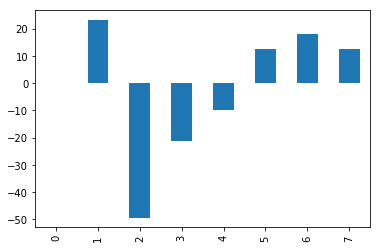

In [34]:
t_values = [-0.08896538137868286, 23.21277691701378, -49.36708157301406, -21.13669261173219, -9.737575825219457,
           12.526187929077842, 18.052093200819733, 12.526187929077842, ]
t_values = pd.Series(t_values)
t_values.plot(kind='bar');

In [35]:
style.use()

NameError: ignored

## Describe the Rep and Dem dataframes

In [36]:
dem.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,258.000000,239.000000,260.000000,259.000000,255.000000,258.000000,259.000000,263.000000,248.000000,263.000000,255.000000,249.000000,252.000000,257.000000,251.000000,185.000000
mean,0.604651,0.502092,0.888462,0.054054,0.215686,0.476744,0.772201,0.828897,0.758065,0.471483,0.505882,0.144578,0.289683,0.350195,0.637450,0.935135
std,0.489876,0.501045,0.315405,0.226562,0.412106,0.500430,0.420224,0.377317,0.429121,0.500138,0.500949,0.352383,0.454518,0.477962,0.481697,0.246956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
rep.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,165.000000,148.000000,164.000000,165.000000,165.000000,166.000000,162.000000,157.000000,165.000000,165.000000,159.000000,155.000000,158.000000,161.000000,156.000000,146.000000
mean,0.187879,0.506757,0.134146,0.987879,0.951515,0.897590,0.240741,0.152866,0.115152,0.557576,0.132075,0.870968,0.860759,0.981366,0.089744,0.657534
std,0.391804,0.501652,0.341853,0.109760,0.215442,0.304104,0.428859,0.361010,0.320176,0.498186,0.339643,0.336322,0.347298,0.135649,0.286735,0.476168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
